In [146]:
import pygad

In [147]:
labyrinth = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
        [0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0], 
        [0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0], 
        [0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0], 
        [0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0], 
        [0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0], 
        [0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0], 
        [0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0], 
        [0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0], 
        [0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0], 
        [0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

start = (1, 1)
end = (10, 10)

In [148]:
# 0 - down, 1 - up, 2 - left, 3 - right
gene_space = [0, 1, 2, 3]

def checkNotColission(row, col):
    if row > 11 or col > 11 or row < 0 or col < 0:
        return False
    if labyrinth[row][col] == 0:
       return False
    return True

def fitness_func(solution, solution_idx):
    move_counter = 0
    end_row, end_col = end
    row, column = start
    
    for i in solution:
        if row == end_row and column == end_col:
            return (move_counter * -1)
        if i == 0:
            if checkNotColission(row + 1, column):
                row += 1
        if i == 1:
            if checkNotColission(row - 1, column):
                row -= 1
        if i == 2:
            if checkNotColission(row, column - 1):
                column -= 1
        if i == 3:
            if checkNotColission(row, column + 1):
                column += 1
        move_counter += 1

    
    return (((abs(end_col - column) + abs(end_row - row)) * -1) - 1) * move_counter

fitness_function = fitness_func

In [149]:
sol_per_pop = 180
num_genes = 30

num_parents_mating = 60
num_generations = 900
keep_parents = 45

#sss = steady, rws=roulette, rank = rankingowa, tournament = turniejowa
parent_selection_type = "rank"

crossover_type = "single_point"

mutation_type = "random"
mutation_percent_genes = 8

Parameters of the best solution : [3. 3. 0. 3. 3. 1. 3. 3. 0. 0. 0. 0. 0. 3. 3. 0. 3. 0. 0. 0. 1. 0. 2. 2.
 0. 2. 1. 3. 0. 2.]
Fitness value of the best solution = -20
Number of steps to achieve the end = 20


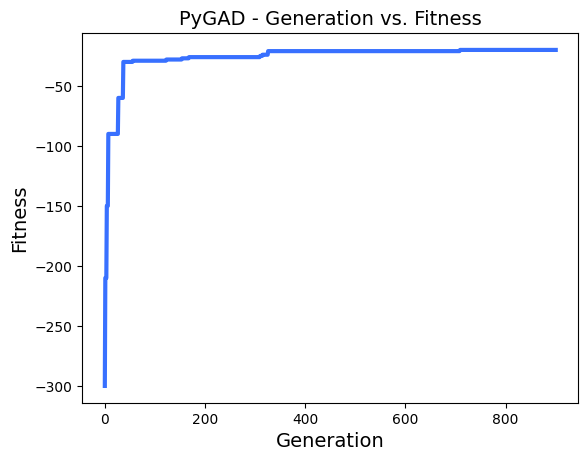

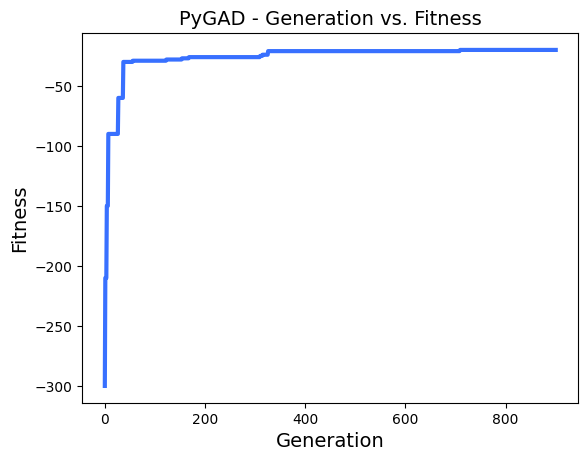

In [150]:
ga_instance = pygad.GA(gene_space=gene_space,
                       num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes)

ga_instance.run()

solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(
    solution_fitness=solution_fitness))
if abs(solution_fitness) > 30:
    print("Did not finish")
else:
    print("Number of steps to achieve the end = {solution_fitness}".format(
        solution_fitness=abs(solution_fitness)))

ga_instance.plot_fitness()